 # **Tema 1  Problema 0**
 
> ¿A qué distancia de los extremos debemos colocar los dedos para conseguir partir un palillo de longitud $2L$ con el menor esfuerzo? 

 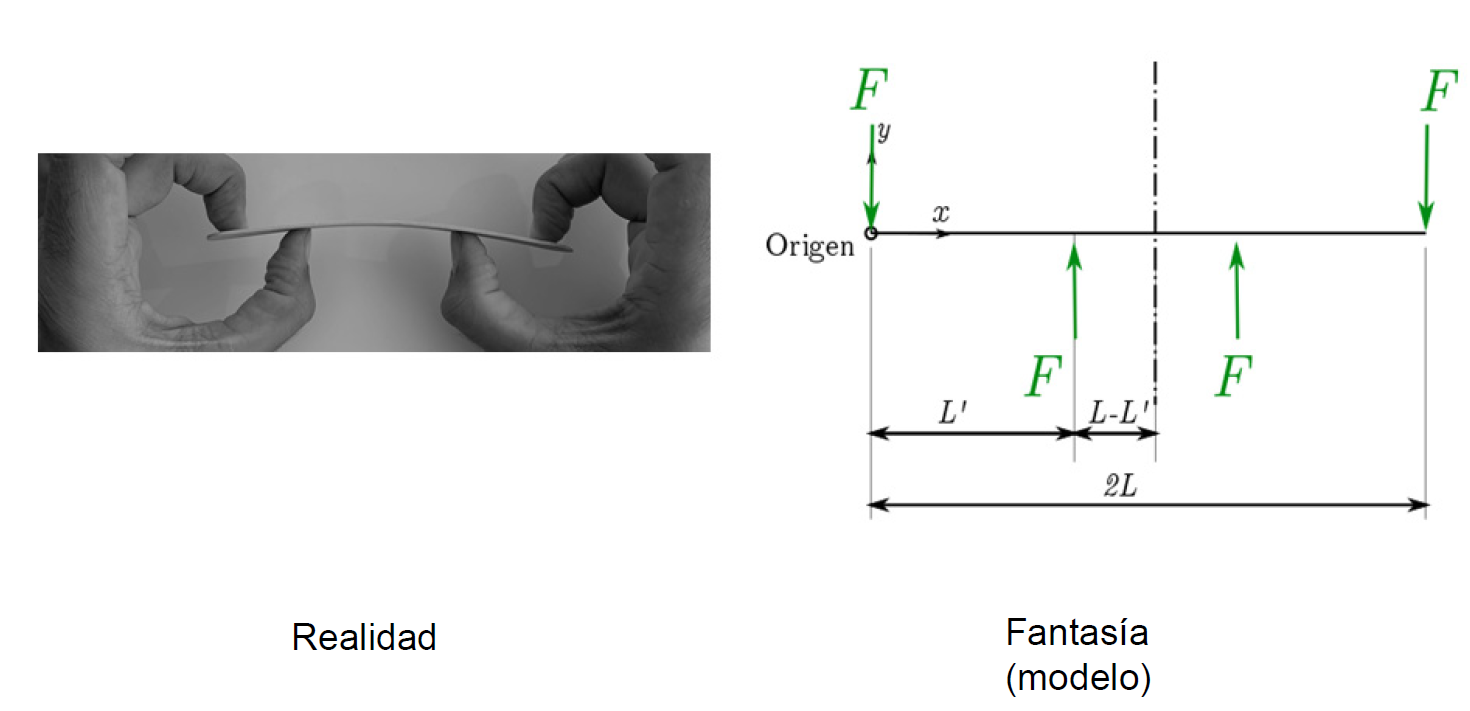


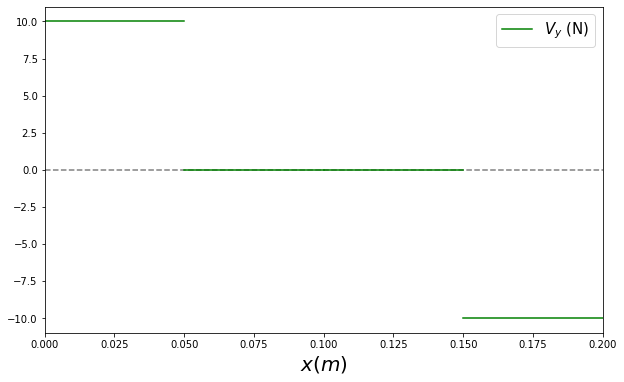

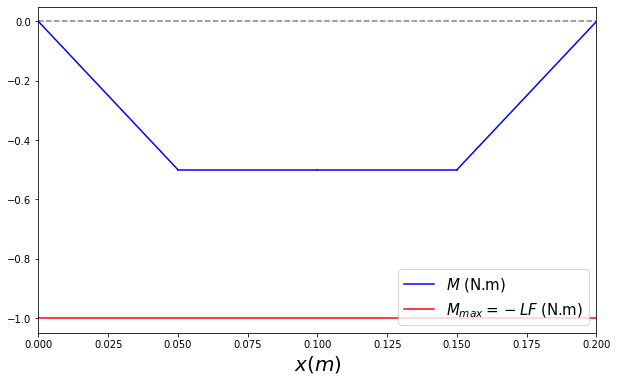

In [ ]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

# Datos del problema
L = 10.0e-2       # metros
Lp= L/2           # metros - Lp = L'
F = 10.0          # Newtons

# Esfuerzos {Vy,M} por tramos en función de F,L y Lp
# Tramo (1)
x=symbols('x')  # x = distancia al origen               
def V1():        
    return  F
def M1(x):        
    return  -x*F

# Tramo (2)
def V2():        
    return  0.0
def M2():        
    return  -Lp*F

# Tramo (3)
def V3():        
    return  0.0
def M3():        
    return  -Lp*F

# Tramo (4)
def V4():        
    return  -F
def M4(x):        
    return  -(2*L-x)*F
#-------------------------------------------------------------------------------------#

# Representación gráfica
Xmin= 0.0 ; Xmax=L; nopto=50 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)
x1=Lp
x2=L
x3=x2+L-Lp
# xab,xbc,... contienen los valores de x para los cuales se representan {Vy,M}
# en cada uno de los tramos
xab=np.linspace(0.0,x1,nopto)
xbc=np.linspace(x1,x2,nopto)
xcd=np.linspace(x2,x3,nopto)
xde=np.linspace(x3,2*L,nopto)
xx=np.linspace(0.0,2*L,nopto)

# fab,fbc...contendrán los valores {Vy,M} para los valores de x en xab,xbc...
fab=np.zeros((nopto,1))
fbc=np.zeros((nopto,1))
fcd=np.zeros((nopto,1))
fde=np.zeros((nopto,1))
cero=np.zeros((nopto,1))
maxM=np.zeros((nopto,1))

# Esfuerzo cortante
for i in range(0,nopto):              
    fab[i]=V1()
    fbc[i]=V2()
    fcd[i]=V3()
    fde[i]=V4()
    cero[i]=0.0              
    
# Representación gráfica del esfuerzo cortante      
fig, ax = plt.subplots(figsize=(10,6))  # Esto es como decir "Abracadabra! Hágase la figura!". 
                                        # Se genera un objeto figura que definimos a continuación
ax.plot(xx,cero, color="grey",linestyle='dashed')
ax.plot(xab,fab, color="green", label="$V_{y}$ (N)")
ax.plot(xbc,fbc, color="green") 
ax.plot(xcd,fcd, color="green")
ax.plot(xde,fde, color="green")
ax.set_xlabel("$x (m)$",size=20) # Nombre y unidades del eje x
ax.set_xlim(0.0,2*L)
ax.legend(fontsize=15) # Hace que se pinte la leyenda

# Momento flector
for i in range(0,nopto):              
    fab[i]=M1(x).subs(x,xab[i]) 
    fbc[i]=M2()
    fcd[i]=M3()
    fde[i]=M4(x).subs(x,xde[i])       
    maxM[i]= -L*F  

# Representación gráfica del momento flector
fig, ax = plt.subplots(figsize=(10,6))  # Esto es como decir "Abracadabra! Hágase la figura!". 
                                        # Se genera un objeto figura que definimos a continuación
ax.plot(xx,cero, color="grey",linestyle='dashed')
ax.plot(xab,fab, color="blue", label="$M$ (N.m)")
ax.plot(xbc,fbc, color="blue") 
ax.plot(xcd,fcd, color="blue")
ax.plot(xde,fde, color="blue")
ax.plot(xx,maxM, color="red", label="$M_{max}=-L F$ (N.m)")
ax.set_xlabel("$x (m)$",size=20) # Nombre y unidades del eje x
ax.set_xlim(0.0,2*L)
ax.legend(fontsize=15,loc="lower right") # Hace que se pinte la leyenda